In [1]:
import schnetpack.nn as snn
import torch.nn as nn
import torch

In [23]:
def init_zeros(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.zeros_(m.weight)
        m.bias.data.fill_(0.00)

net = nn.Sequential(nn.Linear(2, 2), nn.Linear(2, 2))
net.apply(init_zeros)

Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): Linear(in_features=2, out_features=2, bias=True)
)

In [8]:
outnet = snn.build_mlp(
            n_in=128,
            n_out=1,
            n_hidden=None,
            n_layers=1,
            activation=nn.SiLU,
            weight_init = True
        )

In [10]:
outnet[0].weight

Parameter containing:
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.]], requires_grad=True)

In [28]:
outnet[-1].weight

Parameter containing:
tensor([[ 0.1354,  0.2091, -0.0439, -0.1978, -0.1208,  0.1788, -0.1177,  0.1794,
         -0.1620, -0.1841, -0.2049, -0.0432, -0.0546,  0.1342,  0.0477, -0.0185,
         -0.2026, -0.0659, -0.0239, -0.1681, -0.1573,  0.2109,  0.2094,  0.0717,
         -0.0266,  0.1913, -0.0981,  0.0193, -0.0381,  0.1670,  0.1412, -0.1397,
         -0.1784, -0.1206, -0.0819, -0.0300,  0.1275,  0.0028, -0.1009,  0.0944,
         -0.1251,  0.0976,  0.0324,  0.2103, -0.0759,  0.2045,  0.0501,  0.0330,
         -0.0878,  0.1648, -0.1916, -0.1052,  0.1656, -0.1548, -0.1672, -0.1701,
         -0.0631, -0.2110, -0.0602,  0.0496,  0.0104,  0.1854, -0.1713, -0.1307,
          0.0667, -0.1952, -0.0268,  0.1080, -0.1102, -0.2044, -0.1293, -0.2099,
         -0.1317,  0.0647, -0.0923, -0.1171, -0.1904,  0.1427, -0.0570, -0.0647,
         -0.0420, -0.0032,  0.2004,  0.0669,  0.0867,  0.2132, -0.1419,  0.0524,
         -0.0214,  0.1598, -0.2048, -0.1874,  0.0308,  0.0967, -0.1582,  0.0244,
      

In [8]:
for param in outnet.parameters():
    print(param.data)

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 

In [10]:
from schnetpack.nn.activations import _switch_component, switch_function
d_ij = torch.randint(2,11,(100,))
cuton = 1.5
cutoff = 7.5
sf = switch_function(d_ij, cuton, cutoff)

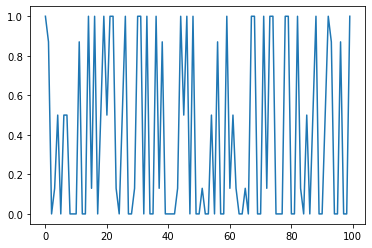

In [7]:
import matplotlib.pyplot as plt
plt.plot(sf)

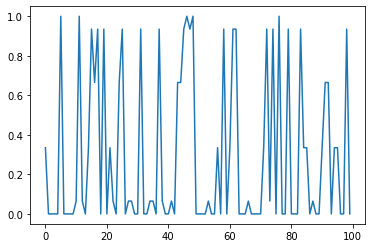

In [11]:
plt.plot(sf)

In [57]:
import torch.nn.functional as F
a = nn.Parameter(torch.tensor([1.,1.,1.,1.]))
d_ij = torch.randn(1000)
a = F.normalize(a, p=1, dim=0)[..., None]
c = torch.randn(4)[..., None]
exp = (c*torch.exp((a*d_ij))).sum(0)


In [59]:
exp*d_ij

tensor([ 1.1039e-01,  1.4945e+00,  1.0416e+00, -1.2628e+00,  1.2811e+00,
         1.5191e+00, -3.2492e+00, -9.0001e-01,  1.3027e+00,  2.2656e+00,
         5.8855e-01,  1.4772e+00, -7.4510e+00,  4.3528e-01,  1.6247e-01,
        -1.2118e+00, -4.6901e+00, -4.3409e+00, -2.1084e+00,  4.3168e-01,
        -5.0089e+00, -5.1536e+00,  1.1828e-01,  1.2207e+00, -3.7416e+00,
         2.4631e+00, -2.0161e+00, -1.4096e+00, -7.8209e-01,  2.0066e+00,
        -9.9620e-02,  3.7822e-01,  1.3123e+00,  1.1050e+00,  1.0931e+00,
        -1.0322e+00,  1.6340e+00,  9.0507e-01, -2.6874e+00,  4.0911e-01,
        -4.7149e+00, -6.9286e+00, -4.9041e-01, -8.5999e+00,  2.1731e-01,
         7.0847e-01,  2.0892e+00, -1.3288e+00,  2.0084e+00, -1.2421e+00,
         3.9386e-01, -5.7665e-01, -8.6093e-01,  9.8254e-02, -4.3873e+00,
         1.2461e+00,  1.6838e+00, -8.1856e-01,  1.9349e+00, -7.0153e-01,
        -5.3249e+00, -2.4403e+00,  8.8913e-01, -1.3986e+00,  1.5260e+00,
         2.6012e+00,  2.5035e-01,  6.0594e-01, -1.0

In [37]:
a.shape

torch.Size([4, 1])